### **Q1**

In [2]:
from torchvision.models import resnet50, ResNet50_Weights
import tensorflow as tf
from torchvision.io import read_image

resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
weights = ResNet50_Weights.IMAGENET1K_V2
model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
model.eval()


preprocess = weights.transforms()

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [3]:
import tensorflow.keras as K
def preprocess_data (X,Y):
  X_P=K.applications.resnet50.preprocess_input(X)
  Y_P=K.utils.to_categorical(Y,10)
  return X_P, Y_P

dataset prepared here

In [4]:
(x_train, y_train),(x_test,y_test)=K.datasets.cifar10.load_data()
print(x_train.shape,y_train.shape)
x_train, y_train = preprocess_data(x_train,y_train)
x_test, y_test = preprocess_data(x_test,y_test)
print(x_train.shape,y_train.shape)

170498071/170498071 [==============================] - 5s 0us/step
(50000, 32, 32, 3) (50000, 1)
(50000, 32, 32, 3) (50000, 10)


ResNet50 network loaded here which was trained on ImageNet

In [5]:
input_t=K.Input(shape=(32,32,3))
res_model = K.applications.ResNet50(include_top=False, weights="imagenet",
                                    input_tensor=input_t)


94765736/94765736 [==============================] - 0s 0us/step


The last FC layer of network was omitted and all other layers were chosen to be non-trainable

In [6]:
for layer in res_model.layers[:175]:
    layer.trainable = False


we can see no layer would be trained

In [7]:
for i, layer in enumerate(res_model.layers):
  print(i, layer.name, "-",layer.trainable)

0 input_1 - False
1 conv1_pad - False
2 conv1_conv - False
3 conv1_bn - False
4 conv1_relu - False
5 pool1_pad - False
6 pool1_pool - False
7 conv2_block1_1_conv - False
8 conv2_block1_1_bn - False
9 conv2_block1_1_relu - False
10 conv2_block1_2_conv - False
11 conv2_block1_2_bn - False
12 conv2_block1_2_relu - False
13 conv2_block1_0_conv - False
14 conv2_block1_3_conv - False
15 conv2_block1_0_bn - False
16 conv2_block1_3_bn - False
17 conv2_block1_add - False
18 conv2_block1_out - False
19 conv2_block2_1_conv - False
20 conv2_block2_1_bn - False
21 conv2_block2_1_relu - False
22 conv2_block2_2_conv - False
23 conv2_block2_2_bn - False
24 conv2_block2_2_relu - False
25 conv2_block2_3_conv - False
26 conv2_block2_3_bn - False
27 conv2_block2_add - False
28 conv2_block2_out - False
29 conv2_block3_1_conv - False
30 conv2_block3_1_bn - False
31 conv2_block3_1_relu - False
32 conv2_block3_2_conv - False
33 conv2_block3_2_bn - False
34 conv2_block3_2_relu - False
35 conv2_block3_3_conv - 

a dense layer with 10 output for cifar 10 was added to the network

In [8]:
model=K.models.Sequential()
model.add(res_model)
model.add(K.layers.Flatten())
model.add(K.layers.Dense(10,activation='softmax'))


In [9]:
check_point = K.callbacks.ModelCheckpoint(filepath="cifar10.h5",
                                          monitor="val_acc",
                                          mode="max",
                                          save_best_only=True,)

NetWork trained here and final model is saved as 'ResNet50'

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer=K.optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=32, epochs=30, verbose=1,
                  validation_data=(x_test,y_test),
                  callbacks=[check_point])
model.summary()
model.save("Resnet50.h5")

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/30
1563/1563 [==============================] - ETA: 0s - loss: 3.1821 - accuracy: 0.2819

1563/1563 [==============================] - 34s 16ms/step - loss: 3.1821 - accuracy: 0.2819 - val_loss: 2.2206 - val_accuracy: 0.4081
Epoch 2/30
1559/1563 [============================>.] - ETA: 0s - loss: 1.9671 - accuracy: 0.4572

1563/1563 [==============================] - 25s 16ms/step - loss: 1.9672 - accuracy: 0.4573 - val_loss: 1.8356 - val_accuracy: 0.4838
Epoch 3/30
1560/1563 [============================>.] - ETA: 0s - loss: 1.7045 - accuracy: 0.5128

1563/1563 [==============================] - 23s 15ms/step - loss: 1.7041 - accuracy: 0.5128 - val_loss: 1.6676 - val_accuracy: 0.5177
Epoch 4/30
1560/1563 [============================>.] - ETA: 0s - loss: 1.5606 - accuracy: 0.5416

1563/1563 [==============================] - 23s 15ms/step - loss: 1.5611 - accuracy: 0.5414 - val_loss: 1.5637 - val_accuracy: 0.5361
Epoch 5/30
1563/1563 [==============================] - ETA: 0s - loss: 1.4642 - accuracy: 0.5627

1563/1563 [==============================] - 23s 15ms/step - loss: 1.4642 - accuracy: 0.5627 - val_loss: 1.4885 - val_accuracy: 0.5519
Epoch 6/30
1562/1563 [============================>.] - ETA: 0s - loss: 1.3925 - accuracy: 0.5773

1563/1563 [==============================] - 23s 15ms/step - loss: 1.3923 - accuracy: 0.5773 - val_loss: 1.4314 - val_accuracy: 0.5650
Epoch 7/30
1560/1563 [============================>.] - ETA: 0s - loss: 1.3349 - accuracy: 0.5892

1563/1563 [==============================] - 25s 16ms/step - loss: 1.3350 - accuracy: 0.5893 - val_loss: 1.3871 - val_accuracy: 0.5708
Epoch 8/30
1562/1563 [============================>.] - ETA: 0s - loss: 1.2878 - accuracy: 0.6000

1563/1563 [==============================] - 23s 15ms/step - loss: 1.2878 - accuracy: 0.5999 - val_loss: 1.3536 - val_accuracy: 0.5799
Epoch 9/30
1563/1563 [==============================] - ETA: 0s - loss: 1.2488 - accuracy: 0.6082

1563/1563 [==============================] - 23s 15ms/step - loss: 1.2488 - accuracy: 0.6082 - val_loss: 1.3221 - val_accuracy: 0.5871
Epoch 10/30
1562/1563 [============================>.] - ETA: 0s - loss: 1.2150 - accuracy: 0.6167

1563/1563 [==============================] - 23s 15ms/step - loss: 1.2152 - accuracy: 0.6167 - val_loss: 1.2961 - val_accuracy: 0.5920
Epoch 11/30
1559/1563 [============================>.] - ETA: 0s - loss: 1.1856 - accuracy: 0.6233

1563/1563 [==============================] - 25s 16ms/step - loss: 1.1855 - accuracy: 0.6234 - val_loss: 1.2744 - val_accuracy: 0.5971
Epoch 12/30
1562/1563 [============================>.] - ETA: 0s - loss: 1.1597 - accuracy: 0.6300

1563/1563 [==============================] - 23s 15ms/step - loss: 1.1596 - accuracy: 0.6300 - val_loss: 1.2526 - val_accuracy: 0.5997
Epoch 13/30
1562/1563 [============================>.] - ETA: 0s - loss: 1.1363 - accuracy: 0.6359

1563/1563 [==============================] - 24s 15ms/step - loss: 1.1364 - accuracy: 0.6359 - val_loss: 1.2377 - val_accuracy: 0.6033
Epoch 14/30
1562/1563 [============================>.] - ETA: 0s - loss: 1.1153 - accuracy: 0.6414

1563/1563 [==============================] - 25s 16ms/step - loss: 1.1155 - accuracy: 0.6413 - val_loss: 1.2191 - val_accuracy: 0.6103
Epoch 15/30
1562/1563 [============================>.] - ETA: 0s - loss: 1.0967 - accuracy: 0.6466

1563/1563 [==============================] - 23s 15ms/step - loss: 1.0967 - accuracy: 0.6466 - val_loss: 1.2059 - val_accuracy: 0.6102
Epoch 16/30
1561/1563 [============================>.] - ETA: 0s - loss: 1.0790 - accuracy: 0.6503

1563/1563 [==============================] - 23s 15ms/step - loss: 1.0791 - accuracy: 0.6504 - val_loss: 1.1947 - val_accuracy: 0.6131
Epoch 17/30
1562/1563 [============================>.] - ETA: 0s - loss: 1.0629 - accuracy: 0.6552

1563/1563 [==============================] - 25s 16ms/step - loss: 1.0630 - accuracy: 0.6552 - val_loss: 1.1834 - val_accuracy: 0.6166
Epoch 18/30
1562/1563 [============================>.] - ETA: 0s - loss: 1.0488 - accuracy: 0.6585

1563/1563 [==============================] - 25s 16ms/step - loss: 1.0489 - accuracy: 0.6584 - val_loss: 1.1726 - val_accuracy: 0.6206
Epoch 19/30
1561/1563 [============================>.] - ETA: 0s - loss: 1.0348 - accuracy: 0.6631

1563/1563 [==============================] - 23s 15ms/step - loss: 1.0351 - accuracy: 0.6631 - val_loss: 1.1631 - val_accuracy: 0.6228
Epoch 20/30
1561/1563 [============================>.] - ETA: 0s - loss: 1.0227 - accuracy: 0.6659

1563/1563 [==============================] - 25s 16ms/step - loss: 1.0230 - accuracy: 0.6659 - val_loss: 1.1540 - val_accuracy: 0.6278
Epoch 21/30
1560/1563 [============================>.] - ETA: 0s - loss: 1.0114 - accuracy: 0.6691

1563/1563 [==============================] - 23s 15ms/step - loss: 1.0109 - accuracy: 0.6692 - val_loss: 1.1475 - val_accuracy: 0.6264
Epoch 22/30
1562/1563 [============================>.] - ETA: 0s - loss: 1.0001 - accuracy: 0.6723

1563/1563 [==============================] - 24s 15ms/step - loss: 1.0000 - accuracy: 0.6724 - val_loss: 1.1390 - val_accuracy: 0.6292
Epoch 23/30
1563/1563 [==============================] - ETA: 0s - loss: 0.9898 - accuracy: 0.6745

1563/1563 [==============================] - 25s 16ms/step - loss: 0.9898 - accuracy: 0.6745 - val_loss: 1.1355 - val_accuracy: 0.6308
Epoch 24/30
1559/1563 [============================>.] - ETA: 0s - loss: 0.9802 - accuracy: 0.6783

1563/1563 [==============================] - 25s 16ms/step - loss: 0.9803 - accuracy: 0.6784 - val_loss: 1.1282 - val_accuracy: 0.6332
Epoch 25/30
1561/1563 [============================>.] - ETA: 0s - loss: 0.9710 - accuracy: 0.6804

1563/1563 [==============================] - 25s 16ms/step - loss: 0.9713 - accuracy: 0.6803 - val_loss: 1.1226 - val_accuracy: 0.6346
Epoch 26/30
1560/1563 [============================>.] - ETA: 0s - loss: 0.9625 - accuracy: 0.6832

1563/1563 [==============================] - 25s 16ms/step - loss: 0.9625 - accuracy: 0.6832 - val_loss: 1.1182 - val_accuracy: 0.6354
Epoch 27/30
1561/1563 [============================>.] - ETA: 0s - loss: 0.9544 - accuracy: 0.6857

1563/1563 [==============================] - 23s 15ms/step - loss: 0.9544 - accuracy: 0.6857 - val_loss: 1.1138 - val_accuracy: 0.6374
Epoch 28/30
1560/1563 [============================>.] - ETA: 0s - loss: 0.9474 - accuracy: 0.6870

1563/1563 [==============================] - 23s 15ms/step - loss: 0.9472 - accuracy: 0.6870 - val_loss: 1.1089 - val_accuracy: 0.6394
Epoch 29/30
1562/1563 [============================>.] - ETA: 0s - loss: 0.9400 - accuracy: 0.6889

1563/1563 [==============================] - 23s 15ms/step - loss: 0.9400 - accuracy: 0.6888 - val_loss: 1.1047 - val_accuracy: 0.6407
Epoch 30/30
1559/1563 [============================>.] - ETA: 0s - loss: 0.9333 - accuracy: 0.6917

1563/1563 [==============================] - 23s 15ms/step - loss: 0.9334 - accuracy: 0.6916 - val_loss: 1.1018 - val_accuracy: 0.6414
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 10)                20490     
                                                                 
Total params: 23,608,202
Trainable params: 20,490
Non-trainable params: 23,587,712
_________________________________________________________________


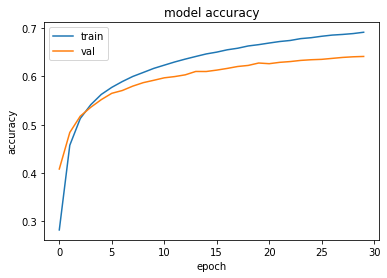

In [11]:
import keras
from matplotlib import pyplot as plt
# history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

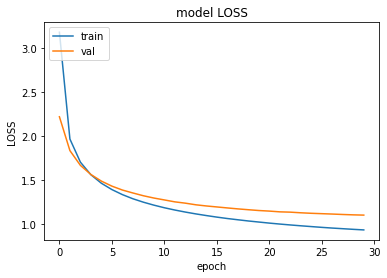

In [42]:
import keras
from matplotlib import pyplot as plt
# history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model LOSS')
plt.ylabel('LOSS')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

we can see Accuracy is about 70%, we just trained last FC layer, <br\>
seems like model is trained good 

### **Q2**
saved resnet50 model is loaded as teacher

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

In [13]:
class Distiller(keras.Model):
    def __init__(self, student, teacher):
        super().__init__()
        self.teacher = teacher
        self.student = student

    def compile(
        self,
        optimizer,
        metrics,
        student_loss_fn,
        distillation_loss_fn,
        alpha=0.1,
        temperature=3,
    ):

        super().compile(optimizer=optimizer, metrics=metrics)
        self.student_loss_fn = student_loss_fn
        self.distillation_loss_fn = distillation_loss_fn
        self.alpha = alpha
        self.temperature = temperature

    def train_step(self, data):
        x, y = data
        teacher_predictions = self.teacher(x, training=False)

        with tf.GradientTape() as tape:
            student_predictions = self.student(x, training=True)

            student_loss = self.student_loss_fn(y, student_predictions)

            distillation_loss = (
                self.distillation_loss_fn(
                    tf.nn.softmax(teacher_predictions / self.temperature, axis=1),
                    tf.nn.softmax(student_predictions / self.temperature, axis=1),
                )
                * self.temperature**2
            )

            loss = self.alpha * student_loss + (1 - self.alpha) * distillation_loss
        trainable_vars = self.student.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)

        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        self.compiled_metrics.update_state(y, student_predictions)
        results = {m.name: m.result() for m in self.metrics}
        results.update(
            {"student_loss": student_loss, "distillation_loss": distillation_loss}
        )
        return results

    def test_step(self, data):
   
        x, y = data
        y_prediction = self.student(x, training=False)
        student_loss = self.student_loss_fn(y, y_prediction)
        self.compiled_metrics.update_state(y, y_prediction)
        results = {m.name: m.result() for m in self.metrics}
        results.update({"student_loss": student_loss})
        return results


In [14]:


from keras.callbacks import EarlyStopping
from keras.layers import Dense, Conv2D,  MaxPool2D, Flatten, GlobalAveragePooling2D,  BatchNormalization, Layer, Add
from keras.models import Sequential
from keras.models import Model
import tensorflow as tf


In [15]:
 pip install git+https://github.com/qubvel/classification_models.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-sf88d8n2
  Running command git clone --filter=blob:none --quiet https://github.com/qubvel/classification_models.git /tmp/pip-req-build-sf88d8n2
  Resolved https://github.com/qubvel/classification_models.git to commit a0f006e05485a34ccf871c421279864b0ccd220b
  Running command git submodule update --init --recursive -q
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 2.5 MB/s eta 0:00:00
  Created wheel for image-classifiers: filename=image_classifiers-1.0.0-py3-none-any.whl size=20045 sha256=168d4062687ebd8ca5405ec9c6435414e3d3432fc22c03dbb18ac45fea2cefc9
  Stored in directory: /tmp/pip-ephem-wheel-cache-mwuu0020/wheels/77/23/ad/afd2caf2877de1a21565559524b6435e5396579c14207062f3
Successfully built image-classifiers


here teacher and student model are introduced <br/>
teacher = Previous part trained Resnet50 <br/>
student = Resnet18

In [16]:

from tensorflow import keras
teacher = keras.models.load_model('Resnet50.h5')

import numpy as np
from skimage.io import imread
from skimage.transform import resize
from keras.applications.imagenet_utils import decode_predictions
from classification_models.keras import Classifiers

ResNet18, preprocess_input = Classifiers.get('resnet18')
student = ResNet18((32, 32, 3), classes=10)

student_scratch = keras.models.clone_model(student)

In [17]:
import numpy as np

y_train=np.where(y_train==1)[1]
y_test=np.where(y_test==1)[1]

In [18]:

distiller = Distiller(student=student, teacher=teacher)
distiller.compile(
    optimizer=keras.optimizers.Adam(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
    student_loss_fn=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    distillation_loss_fn=keras.losses.KLDivergence(),
    alpha=0.1,
    temperature=10,
)

history_dist=distiller.fit(x_train, y_train, epochs=3)

distiller.evaluate(x_test, y_test)

Epoch 1/3


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 57s 33ms/step - sparse_categorical_accuracy: 0.5043 - student_loss: 1.3947 - distillation_loss: 0.0188
Epoch 2/3
1563/1563 [==============================] - 47s 30ms/step - sparse_categorical_accuracy: 0.6554 - student_loss: 0.9945 - distillation_loss: 0.0153
Epoch 3/3
313/313 [==============================] - 2s 7ms/step - sparse_categorical_accuracy: 0.7138 - student_loss: 0.8227


[0.7138000130653381, 0.6683698892593384]

In [19]:
distiller.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - sparse_categorical_accuracy: 0.7138 - student_loss: 0.8227


[0.7138000130653381, 0.6683698892593384]

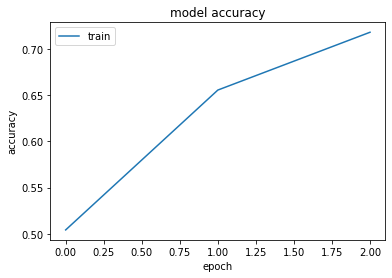

In [26]:
import keras
from matplotlib import pyplot as plt
# history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(history_dist.history['sparse_categorical_accuracy'])
# plt.plot(history_dist.history['student_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

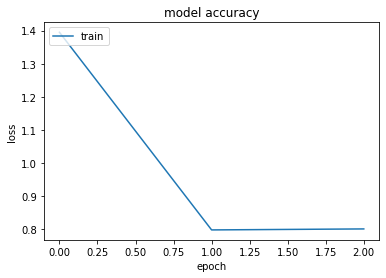

In [31]:
# plt.plot(history_dist.history['sparse_categorical_accuracy'])
plt.plot(history_dist.history['student_loss'])
plt.title('model LOSS')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Resnet18 trained for 3 epochs reached accuracy 78%<br/>
alpha=0.1,<br/>
temperature=10,

In [21]:

student_scratch.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)


history_student=student_scratch.fit(x_train, y_train, epochs=3)
student_scratch.evaluate(x_test, y_test)

Epoch 1/3
1563/1563 [==============================] - 37s 22ms/step - loss: 1.4219 - sparse_categorical_accuracy: 0.4914
Epoch 2/3
1563/1563 [==============================] - 31s 20ms/step - loss: 1.0179 - sparse_categorical_accuracy: 0.6445
Epoch 3/3
313/313 [==============================] - 2s 7ms/step - loss: 0.7868 - sparse_categorical_accuracy: 0.7254


[0.7868181467056274, 0.7253999710083008]

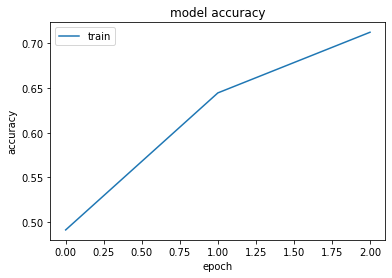

In [28]:
import keras
from matplotlib import pyplot as plt
# history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(history_student.history['sparse_categorical_accuracy'])
# plt.plot(history_student.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

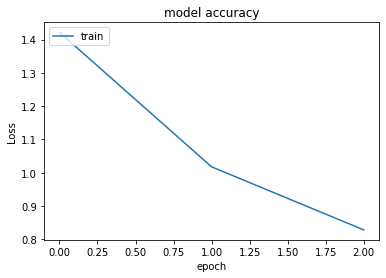

In [30]:
import keras
from matplotlib import pyplot as plt
# history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
# plt.plot(history_student.history['sparse_categorical_accuracy'])
plt.plot(history_student.history['loss'])
plt.title('model LOss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Q_3

in this part Resnet18 model is trained on Cifar 10 




In [32]:
from classification_models.keras import Classifiers

ResNet18, preprocess_input = Classifiers.get('resnet18')

# input_t=K.Input(shape=(32,32,3))
res_model = ResNet18((32, 32, 3), classes=10)
model=K.models.Sequential()
model.add(res_model)

(x_train, y_train),(x_test,y_test)=K.datasets.cifar10.load_data()
print(x_train.shape,y_train.shape)
x_train, y_train = preprocess_data(x_train,y_train)
x_test, y_test = preprocess_data(x_test,y_test)
print(x_train.shape,y_train.shape)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
historyResnet18=model.fit(x_train,y_train,batch_size=32, epochs=10, verbose=1,
                  validation_data=(x_test,y_test),
                  callbacks=[check_point])
model.summary()

(50000, 32, 32, 3) (50000, 1)
(50000, 32, 32, 3) (50000, 10)
Epoch 1/10
1563/1563 [==============================] - ETA: 0s - loss: 1.4170 - accuracy: 0.4941

1563/1563 [==============================] - 36s 22ms/step - loss: 1.4170 - accuracy: 0.4941 - val_loss: 1.2114 - val_accuracy: 0.5655
Epoch 2/10
1563/1563 [==============================] - ETA: 0s - loss: 1.0040 - accuracy: 0.6513

1563/1563 [==============================] - 35s 22ms/step - loss: 1.0040 - accuracy: 0.6513 - val_loss: 0.9539 - val_accuracy: 0.6746
Epoch 3/10
1563/1563 [==============================] - ETA: 0s - loss: 0.8129 - accuracy: 0.7203

1563/1563 [==============================] - 33s 21ms/step - loss: 0.8129 - accuracy: 0.7203 - val_loss: 0.9194 - val_accuracy: 0.6821
Epoch 4/10
1562/1563 [============================>.] - ETA: 0s - loss: 0.6843 - accuracy: 0.7638

1563/1563 [==============================] - 34s 21ms/step - loss: 0.6843 - accuracy: 0.7638 - val_loss: 0.7652 - val_accuracy: 0.7370
Epoch 5/10
1561/1563 [============================>.] - ETA: 0s - loss: 0.5769 - accuracy: 0.8019

1563/1563 [==============================] - 34s 22ms/step - loss: 0.5768 - accuracy: 0.8018 - val_loss: 0.7868 - val_accuracy: 0.7376
Epoch 6/10
1562/1563 [============================>.] - ETA: 0s - loss: 0.4820 - accuracy: 0.8332

1563/1563 [==============================] - 34s 22ms/step - loss: 0.4820 - accuracy: 0.8333 - val_loss: 0.7194 - val_accuracy: 0.7563
Epoch 7/10
1563/1563 [==============================] - ETA: 0s - loss: 0.3900 - accuracy: 0.8653

1563/1563 [==============================] - 34s 21ms/step - loss: 0.3900 - accuracy: 0.8653 - val_loss: 0.7745 - val_accuracy: 0.7554
Epoch 8/10
1563/1563 [==============================] - ETA: 0s - loss: 0.3209 - accuracy: 0.8896

1563/1563 [==============================] - 34s 21ms/step - loss: 0.3209 - accuracy: 0.8896 - val_loss: 0.7933 - val_accuracy: 0.7540
Epoch 9/10
1561/1563 [============================>.] - ETA: 0s - loss: 0.2498 - accuracy: 0.9129

1563/1563 [==============================] - 33s 21ms/step - loss: 0.2498 - accuracy: 0.9129 - val_loss: 0.8117 - val_accuracy: 0.7725
Epoch 10/10
1563/1563 [==============================] - ETA: 0s - loss: 0.2030 - accuracy: 0.9298

1563/1563 [==============================] - 34s 22ms/step - loss: 0.2030 - accuracy: 0.9298 - val_loss: 0.8548 - val_accuracy: 0.7680
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_1 (Functional)        (None, 10)                11192019  
                                                                 
Total params: 11,192,019
Trainable params: 11,184,077
Non-trainable params: 7,942
_________________________________________________________________


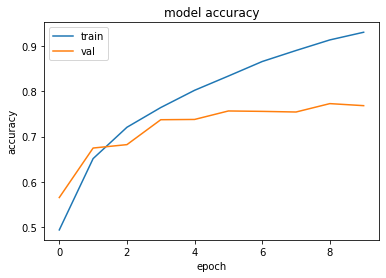

In [33]:
import keras
from matplotlib import pyplot as plt
# history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(historyResnet18.history['accuracy'])
plt.plot(historyResnet18.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

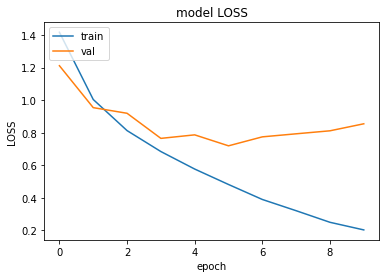

In [40]:
import keras
from matplotlib import pyplot as plt
# history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(historyResnet18.history['loss'])
plt.plot(historyResnet18.history['val_loss'])
plt.title('model LOSS')
plt.ylabel('LOSS')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

model accuracy and loss in this method and teacher and stundent method on validation dataset is almost the same


### Q_4

Fine Tune Part

In [34]:
from torchvision.models import resnet50, ResNet50_Weights
import tensorflow as tf
resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)

weights = ResNet50_Weights.IMAGENET1K_V2
model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
model.eval()

preprocess = weights.transforms()

resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [35]:
import tensorflow.keras as K
def preprocess_data (X,Y):
  X_P=K.applications.resnet50.preprocess_input(X)
  Y_P=K.utils.to_categorical(Y,10)
  return X_P, Y_P



In [36]:
input_t=K.Input(shape=(32,32,3))
res_model = K.applications.ResNet50(include_top=False, weights="imagenet",
                                    input_tensor=input_t)
model=K.models.Sequential()
model.add(res_model)
model.add(K.layers.Flatten())
model.add(K.layers.Dense(10,activation='softmax'))

(x_train, y_train),(x_test,y_test)=K.datasets.cifar10.load_data()
print(x_train.shape,y_train.shape)
x_train, y_train = preprocess_data(x_train,y_train)
x_test, y_test = preprocess_data(x_test,y_test)
print(x_train.shape,y_train.shape)



(50000, 32, 32, 3) (50000, 1)
(50000, 32, 32, 3) (50000, 10)


In [37]:

check_point = K.callbacks.ModelCheckpoint(filepath="cifar10.h5",
                                          monitor="val_acc",
                                          mode="max",
                                          save_best_only=True,)

In [38]:
model.compile(loss='categorical_crossentropy',
              optimizer=K.optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])
historyfine=model.fit(x_train,y_train,batch_size=32, epochs=10, verbose=1,
                  validation_data=(x_test,y_test),
                  callbacks=[check_point])
model.summary()

Epoch 1/10
1563/1563 [==============================] - ETA: 0s - loss: 1.8048 - accuracy: 0.4260

1563/1563 [==============================] - 92s 52ms/step - loss: 1.8048 - accuracy: 0.4260 - val_loss: 1.5345 - val_accuracy: 0.6123
Epoch 2/10
1562/1563 [============================>.] - ETA: 0s - loss: 1.0030 - accuracy: 0.6602

1563/1563 [==============================] - 77s 49ms/step - loss: 1.0029 - accuracy: 0.6603 - val_loss: 1.1158 - val_accuracy: 0.7098
Epoch 3/10
1563/1563 [==============================] - ETA: 0s - loss: 0.7652 - accuracy: 0.7415

1563/1563 [==============================] - 76s 49ms/step - loss: 0.7652 - accuracy: 0.7415 - val_loss: 0.9459 - val_accuracy: 0.7431
Epoch 4/10
1562/1563 [============================>.] - ETA: 0s - loss: 0.6065 - accuracy: 0.7934

1563/1563 [==============================] - 76s 49ms/step - loss: 0.6064 - accuracy: 0.7934 - val_loss: 0.8762 - val_accuracy: 0.7628
Epoch 5/10
1562/1563 [============================>.] - ETA: 0s - loss: 0.4811 - accuracy: 0.8364

1563/1563 [==============================] - 76s 49ms/step - loss: 0.4811 - accuracy: 0.8364 - val_loss: 1.1218 - val_accuracy: 0.7687
Epoch 6/10
1563/1563 [==============================] - ETA: 0s - loss: 0.3953 - accuracy: 0.8665

1563/1563 [==============================] - 77s 49ms/step - loss: 0.3953 - accuracy: 0.8665 - val_loss: 1.2334 - val_accuracy: 0.7793
Epoch 7/10
1562/1563 [============================>.] - ETA: 0s - loss: 0.3228 - accuracy: 0.8904

1563/1563 [==============================] - 79s 50ms/step - loss: 0.3229 - accuracy: 0.8904 - val_loss: 1.0762 - val_accuracy: 0.7860
Epoch 8/10
1563/1563 [==============================] - ETA: 0s - loss: 0.2618 - accuracy: 0.9115

1563/1563 [==============================] - 79s 51ms/step - loss: 0.2618 - accuracy: 0.9115 - val_loss: 1.9634 - val_accuracy: 0.7736
Epoch 9/10
1563/1563 [==============================] - ETA: 0s - loss: 0.2153 - accuracy: 0.9276

1563/1563 [==============================] - 79s 50ms/step - loss: 0.2153 - accuracy: 0.9276 - val_loss: 1.1552 - val_accuracy: 0.7898
Epoch 10/10
1562/1563 [============================>.] - ETA: 0s - loss: 0.1727 - accuracy: 0.9427

1563/1563 [==============================] - 77s 49ms/step - loss: 0.1728 - accuracy: 0.9426 - val_loss: 0.9611 - val_accuracy: 0.7941
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                20490     
                                                                 
Total params: 23,608,202
Trainable params: 23,555,082
Non-trainable params: 53,120
_________________________________________________________________


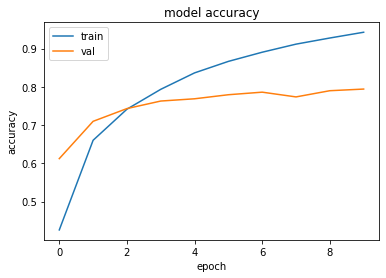

In [39]:
import keras
from matplotlib import pyplot as plt
# history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(historyfine.history['accuracy'])
plt.plot(historyfine.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

in fine tune step, the accuracy and loss on train dataset imporoved, but couldnt classify validation dataset which means model is overtrained, loss on validation dataset is not satisfying.

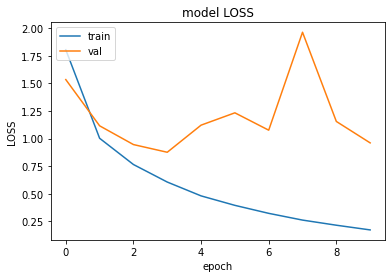

In [43]:
import keras
from matplotlib import pyplot as plt
# history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(historyfine.history['loss'])
plt.plot(historyfine.history['val_loss'])
plt.title('model LOSS')
plt.ylabel('LOSS')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()